In [89]:
# to install MapsMX use: pip install mapsmx
from mapsmx import MapsMX
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [90]:
# Input data for labor

x = ["MEX", "CA"] # x axis is MEX and CA production

# data for stacked barplot by wine types
low_fruta_mex = [358790,548665.488]
high_fruta_nonmex = [0,467381.712]

low_vino_mex = [75195,1655794.062]
high_vino_nonmex = [0,1410491.238]

low_pasa_mex = [18140,494778.699]
high_pasa_nonmex = [0,421478.151]

In [91]:
# Prepare data for maps

# get state outlines with centroids
state_w_centroids = MapsMX().get_geo('state', add_centroids=True)

# get municipio outlines with centroids
muns_w_centroids = MapsMX().get_geo('municipality', add_centroids=True)

# read in data for grape production in méxico
data = pd.read_csv("estados_mex_data.csv", encoding='latin1')

# get fruta, vino, and pasa data
fruta_data = data["uva_fruta"]
vino_data = data["uva_vino"]
pasa_data = data["uva_pasa"]

# add data to state dataframe
state_w_centroids["fruta"] = fruta_data
state_w_centroids["vino"] = vino_data
state_w_centroids["pasa"] = pasa_data

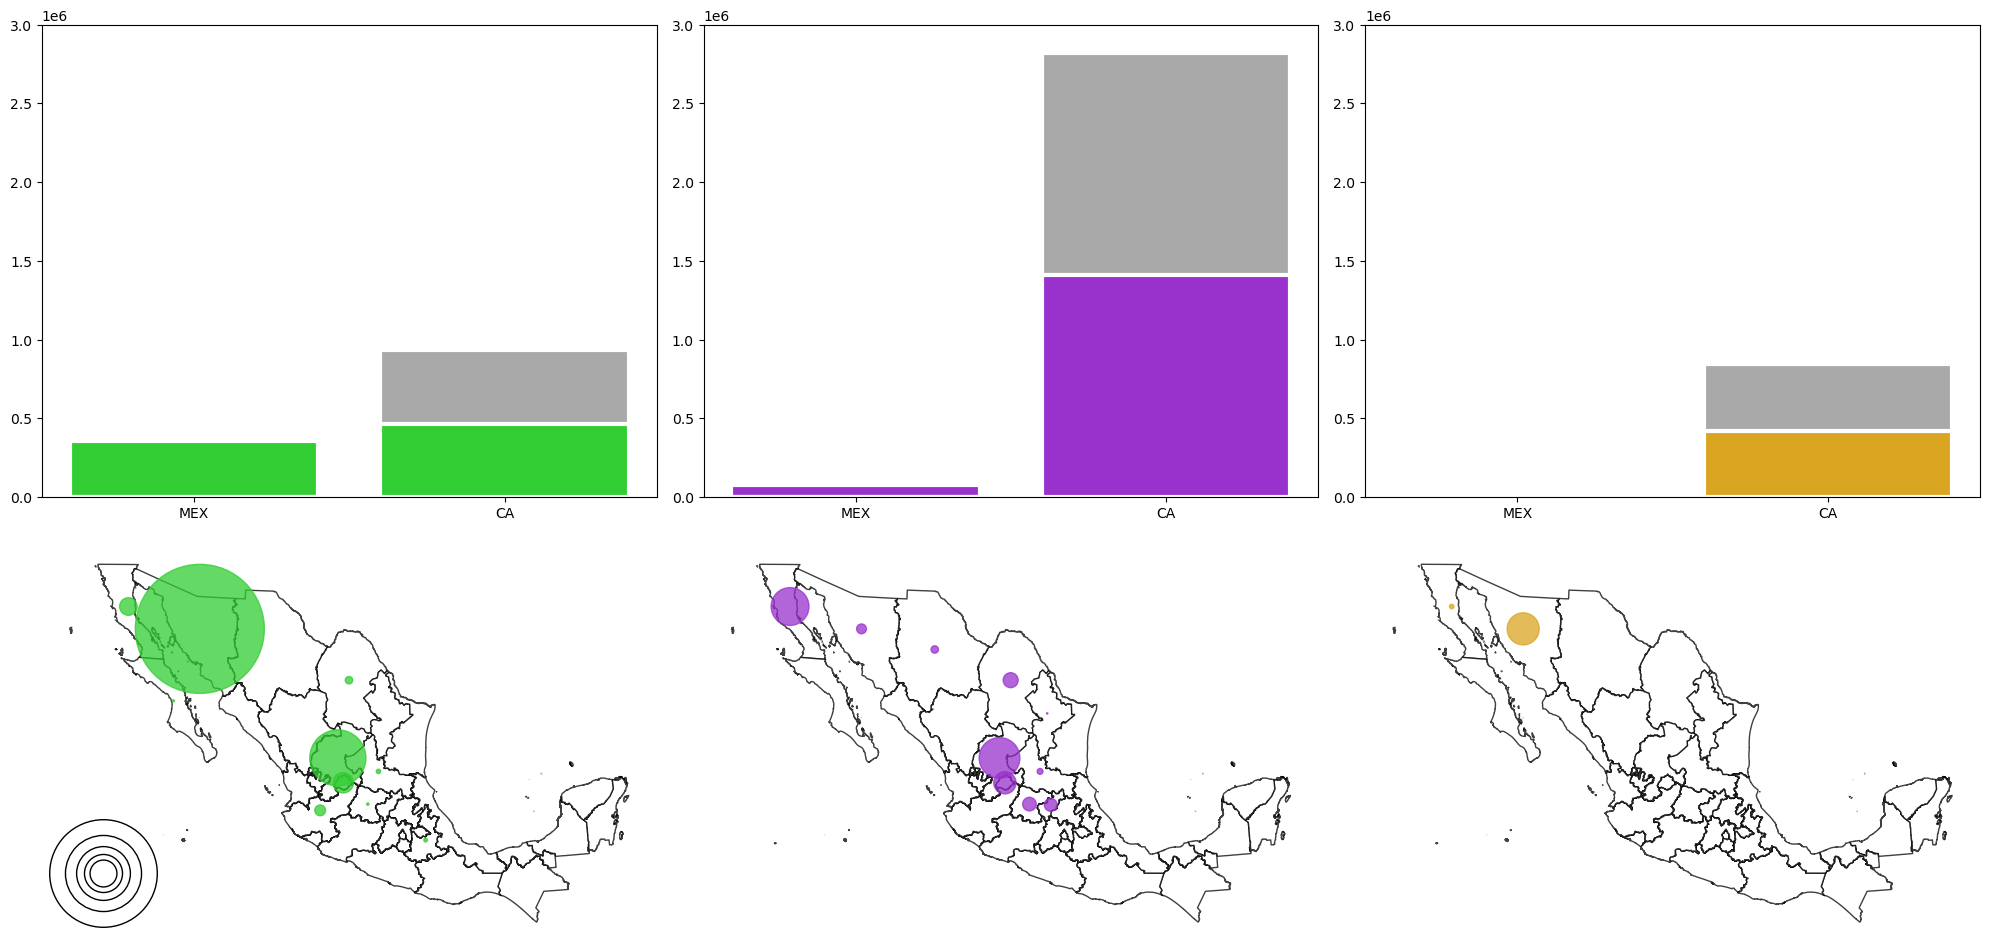

In [92]:
# colors for grape types
vino_color = "darkorchid" # vino color
fruta_color = "limegreen" # fruta color
pasa_color = "goldenrod" # pasa color

# parameters for labor bar plots
nonmex_color = "darkgray" # color of non-Mex labor contributions
bar_edge_col = "white" # bar plot edge color
bar_lw = 3 # bar plot edge lw

# parameters for map
marker_scale = 0.03 # scale for markers
marker_alpha = 0.75 # marker transparency
state_alpha = 0.75 # state border transparency
title_fs = 20 # title fontsize

# note that 4-6 (labor) is before 1-3 (maps)
fig, ((ax4, ax5, ax6), (ax1, ax2, ax3)) = plt.subplots(2,3)

fig.set_size_inches(20, 10)

#################
### fruta bar ###
#################

ax4.bar(x, low_fruta_mex, color=fruta_color, edgecolor=bar_edge_col, lw=bar_lw)

ax4.bar(x, high_fruta_nonmex, bottom=high_fruta_nonmex, color=nonmex_color, 
        edgecolor=bar_edge_col, lw=bar_lw)

ax4.set_ylim([0,3000000])

#################
### vino bar ####
#################

ax5.bar(x, low_vino_mex, color=vino_color, edgecolor=bar_edge_col, lw=bar_lw)

ax5.bar(x, high_vino_nonmex, bottom=high_vino_nonmex, color=nonmex_color, 
        edgecolor=bar_edge_col, lw=bar_lw)

ax5.set_ylim([0,3000000])

#################
### pasa bar ####
#################

ax6.bar(x, low_pasa_mex, color=pasa_color, edgecolor=bar_edge_col, lw=bar_lw)

ax6.bar(x, high_pasa_nonmex, bottom=high_pasa_nonmex, color=nonmex_color, 
        edgecolor=bar_edge_col, lw=bar_lw)

ax6.set_ylim([0,3000000])


#################
### fruta map ###
#################

state_w_centroids.plot(ax=ax1, color='white', edgecolor='black', alpha=state_alpha)

state_w_centroids["centroid_ent"].plot(ax=ax1, 
                                      color=fruta_color, 
                                      alpha=marker_alpha, 
                                      markersize=state_w_centroids["fruta"]*marker_scale)
# scale
ax1.scatter(1.1*10**6,0.6*10**6,s=200000*marker_scale,color="white",edgecolor="black")
ax1.scatter(1.1*10**6,0.6*10**6,s=100000*marker_scale,color="white",edgecolor="black")
ax1.scatter(1.1*10**6,0.6*10**6,s=50000*marker_scale,color="white",edgecolor="black")
ax1.scatter(1.1*10**6,0.6*10**6,s=25000*marker_scale,color="white",edgecolor="black")
ax1.scatter(1.1*10**6,0.6*10**6,s=12500*marker_scale,color="white",edgecolor="black")


#ax1.set_title('Uva fruta', size=title_fs)
ax1.axis("off")

################
### vino map ###
################

state_w_centroids.plot(ax=ax2, color='white', edgecolor='black', alpha=state_alpha)

state_w_centroids["centroid_ent"].plot(ax=ax2, 
                                      color=vino_color, 
                                      alpha=marker_alpha, 
                                      markersize=state_w_centroids["vino"]*marker_scale
                                      )
#ax2.set_title('Uva vino', size=title_fs)
ax2.axis("off")

################
### pasa map ###
################

state_w_centroids.plot(ax=ax3, color='white', edgecolor='black', alpha=state_alpha)

state_w_centroids["centroid_ent"].plot(ax=ax3, 
                                      color=pasa_color, 
                                      alpha=marker_alpha, 
                                      markersize=state_w_centroids["pasa"]*marker_scale
                                      )
#ax3.set_title('Uva pasa', size=title_fs)
ax3.axis("off")

fig.tight_layout()

plt.savefig("mexico_uva.png")